In [15]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

## 1. The XOR data


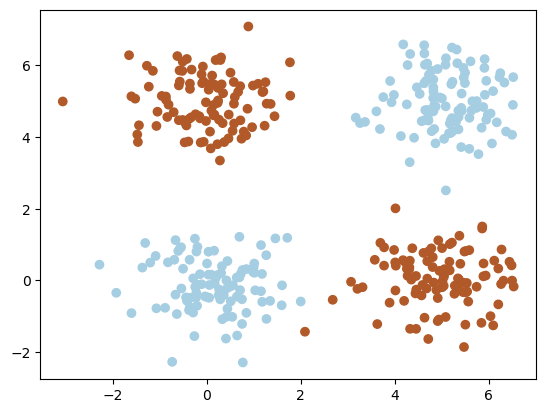

In [2]:
# We create four blobs with different centers to create the original data
centers = ([0, 0], [0, 5], [5, 0], [5, 5])
X, y = datasets.make_blobs(n_samples=400, centers = centers, cluster_std=0.8)
# Reduce the classes to two classe simulating the XOR problem 
y[y == 3] = 0
y[y == 2] = 1
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

In [8]:
# Scale and split the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [10]:
# Define the neural network model
model = Sequential([
    Dense(2, input_shape=(2,), activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')                  # Output layer
])

c:\Users\STRON\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [13]:
# Evaluate the model
print("Model accuracy on test set:", model.evaluate(X_test, y_test, verbose=0)[1])

Model accuracy on test set: 0.4833333194255829


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


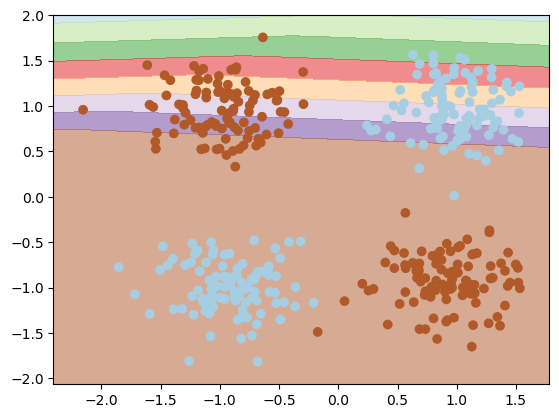

In [16]:
# Plot decision boundaries
def plot_decision_boundary(X, y, model):
    # Create a range for x values covering slightly more than the min and max of the data
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
    # Create a range for y values covering slightly more than the min and max of the data
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
    # Create a meshgrid from the x and y ranges
    xx, yy = np.meshgrid(x_span, y_span)
    # Flatten the meshgrid matrices and concatenate them into a 2D array of points
    grid = np.c_[xx.ravel(), yy.ravel()]
    # Predict the model output for each point in the grid
    pred_func = model.predict(grid)
    # Reshape the predictions to have the same structure as the meshgrid matrices
    z = pred_func.reshape(xx.shape)
    # Plot the contour map using the predictions, indicating decision boundaries
    plt.contourf(xx, yy, z, alpha=0.5, cmap=plt.cm.Paired)
    # Overlay the scatter plot of the actual data points, colored by their true labels
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    # Display the plot
    plt.show()

plot_decision_boundary(X_scaled, y, model)